https://www.kaggle.com/datasets/loveall/appliances-energy-prediction

Context
Experimental data used to create regression models of appliances energy use in a low energy building.

Content
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

#### Data detail:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

In [2]:
import pandas as pd
import numpy as np

In [4]:
pip install kagglehub


     ---------------------------------------- 70.6/70.6 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 160.4/160.4 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 158.8/158.8 kB ? eta 0:00:00
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
     ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00
  Using cached protobuf-6.33.5-cp310-abi3-win_amd64.whl (437 kB)
  Using cached charset_normalizer-3.4.4-cp311-cp311-win_amd64.whl (106 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl (131 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl (152 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("loveall/appliances-energy-prediction")
print("Dataset downloaded to:", path)
print("Files in directory:", os.listdir(path))

csv_path = os.path.join(path, "KAG_energydata_complete.csv")
df = pd.read_csv(csv_path)

df.head()



Dataset downloaded to: C:\Users\fatem\.cache\kagglehub\datasets\loveall\appliances-energy-prediction\versions\1
Files in directory: ['KAG_energydata_complete.csv']


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df.shape

(19735, 29)

In [8]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='str')

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  str    
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9           19

In [10]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [13]:
# removing irrelevant features
df = df.drop(['rv1', 'rv2'], axis=1)

In [15]:
pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 32.5 MB/s eta 0:00:00
     ---------------------------------------- 225.2/225.2 kB ? eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 50.5 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB ? eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 40.8 MB/s eta 0:00:00
     ---------------------------------------- 122.8/122.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Count')

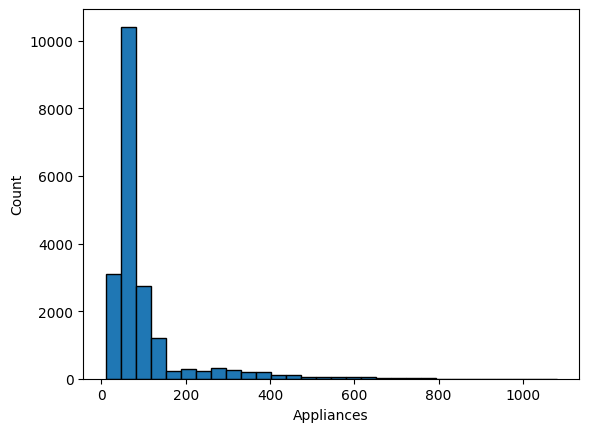

In [70]:
plt.hist(df["Appliances"], bins=30, edgecolor='black')
plt.xlabel("Appliances")
plt.ylabel("Count") 

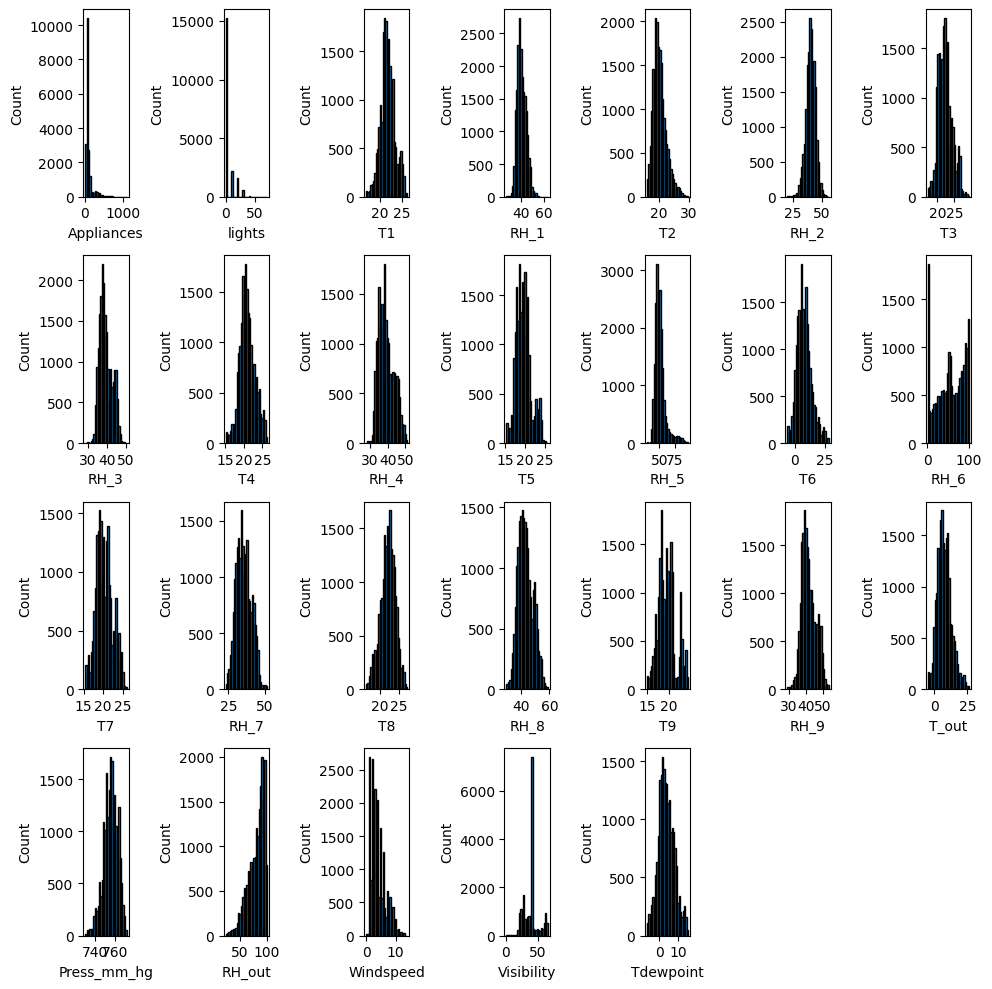

In [16]:
import matplotlib.pyplot as plt

num_cols = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint']

plt.figure(figsize=(10, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 7, i)  
    plt.hist(df[col], bins=30, edgecolor='black')  
    plt.xlabel(col)
    plt.ylabel("Count")
   
plt.tight_layout() 
plt.show()

In [17]:
# correlation between Appliances and other features
df.corr(numeric_only=True)['Appliances'].sort_values(key=abs, ascending=False)

Appliances     1.000000
lights         0.197278
RH_out        -0.152282
T2             0.120073
T6             0.117638
T_out          0.099155
RH_8          -0.094039
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
T1             0.055447
RH_9          -0.051462
T4             0.040281
T8             0.039572
RH_3           0.036292
Press_mm_hg   -0.034885
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
Name: Appliances, dtype: float64

In [18]:
df['date'] = pd.to_datetime(df['date'])

# Extract time features as they might affect the energy consumption

df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,day_of_week,day,month,weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,17,0,11,1,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,17,0,11,1,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,17,0,11,1,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,17,0,11,1,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,17,0,11,1,0


In [19]:
df['hour'] = df['hour'].astype('int8')
df['day_of_week'] = df['day_of_week'].astype('category')
df['day'] = df['day'].astype('int8')
df['month'] = df['month'].astype('category')
df['weekend'] = df['weekend'].astype('bool')

In [20]:
# we do not need date col anymore
df = df.drop(['date'], axis=1)

In [21]:
df.day_of_week.unique()
# Monday=0, Sunday=6

[0, 1, 2, 3, 4, 5, 6]
Categories (7, int32): [0, 1, 2, 3, 4, 5, 6]

In [22]:
df.weekend.unique()

array([False,  True])

In [23]:
df.dtypes

Appliances        int64
lights            int64
T1              float64
RH_1            float64
T2              float64
RH_2            float64
T3              float64
RH_3            float64
T4              float64
RH_4            float64
T5              float64
RH_5            float64
T6              float64
RH_6            float64
T7              float64
RH_7            float64
T8              float64
RH_8            float64
T9              float64
RH_9            float64
T_out           float64
Press_mm_hg     float64
RH_out          float64
Windspeed       float64
Visibility      float64
Tdewpoint       float64
hour               int8
day_of_week    category
day                int8
month          category
weekend            bool
dtype: object

In [25]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


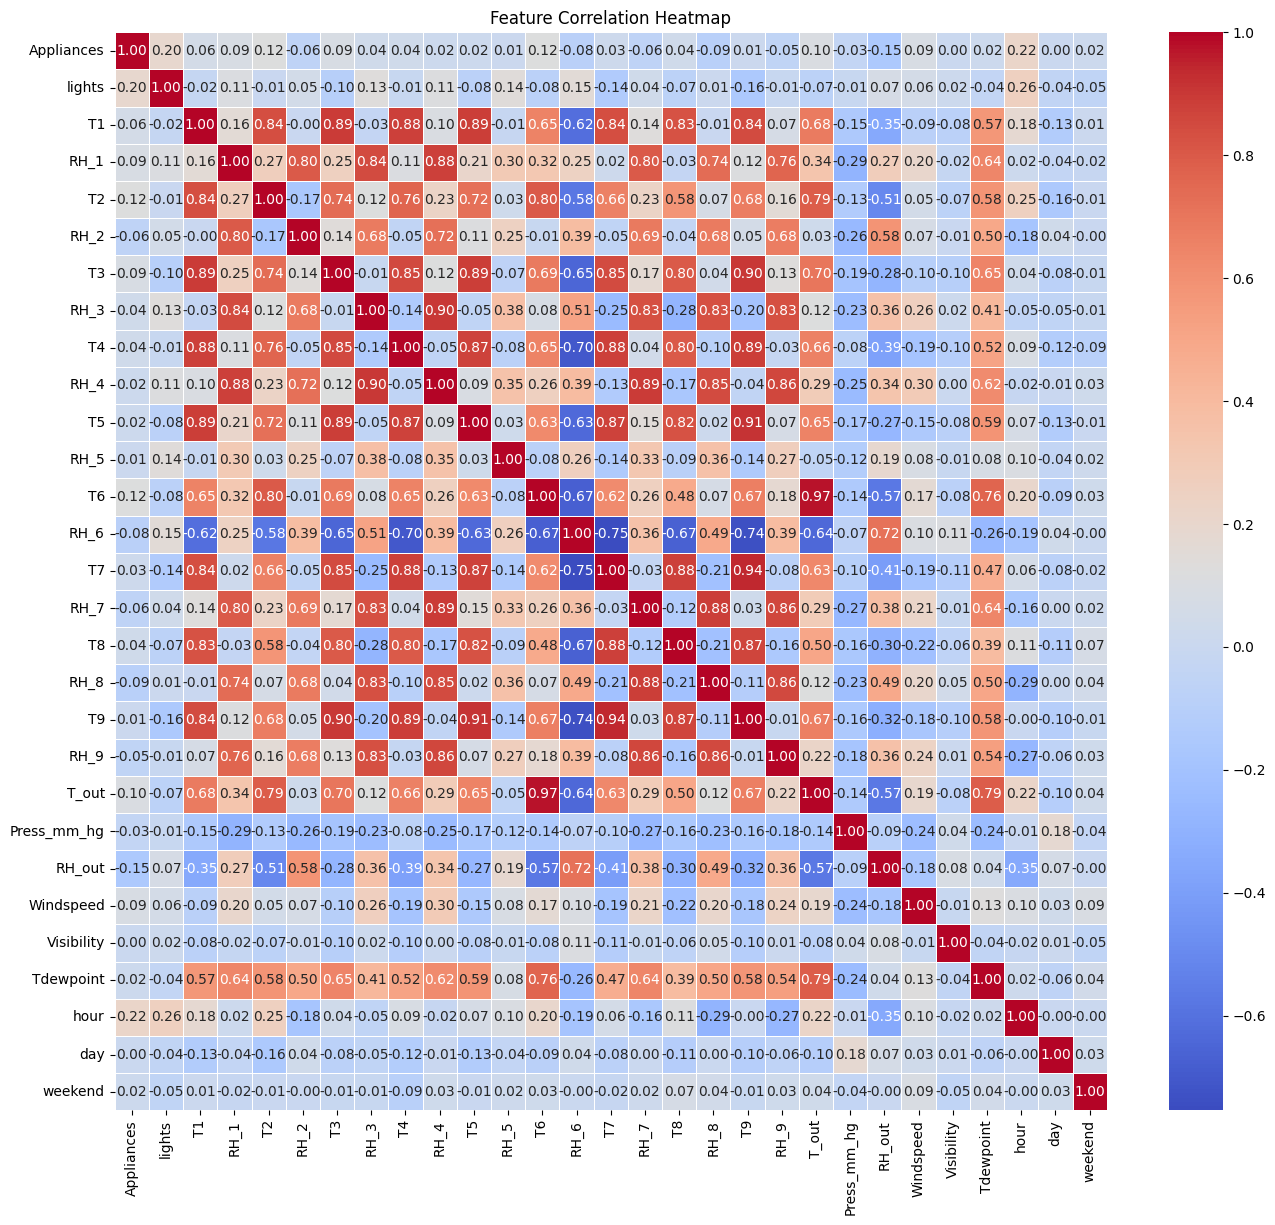

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [27]:
# t_out and T_6 are highly correlated (both showing outside temperature)
df = df.drop(['T6'], axis=1)

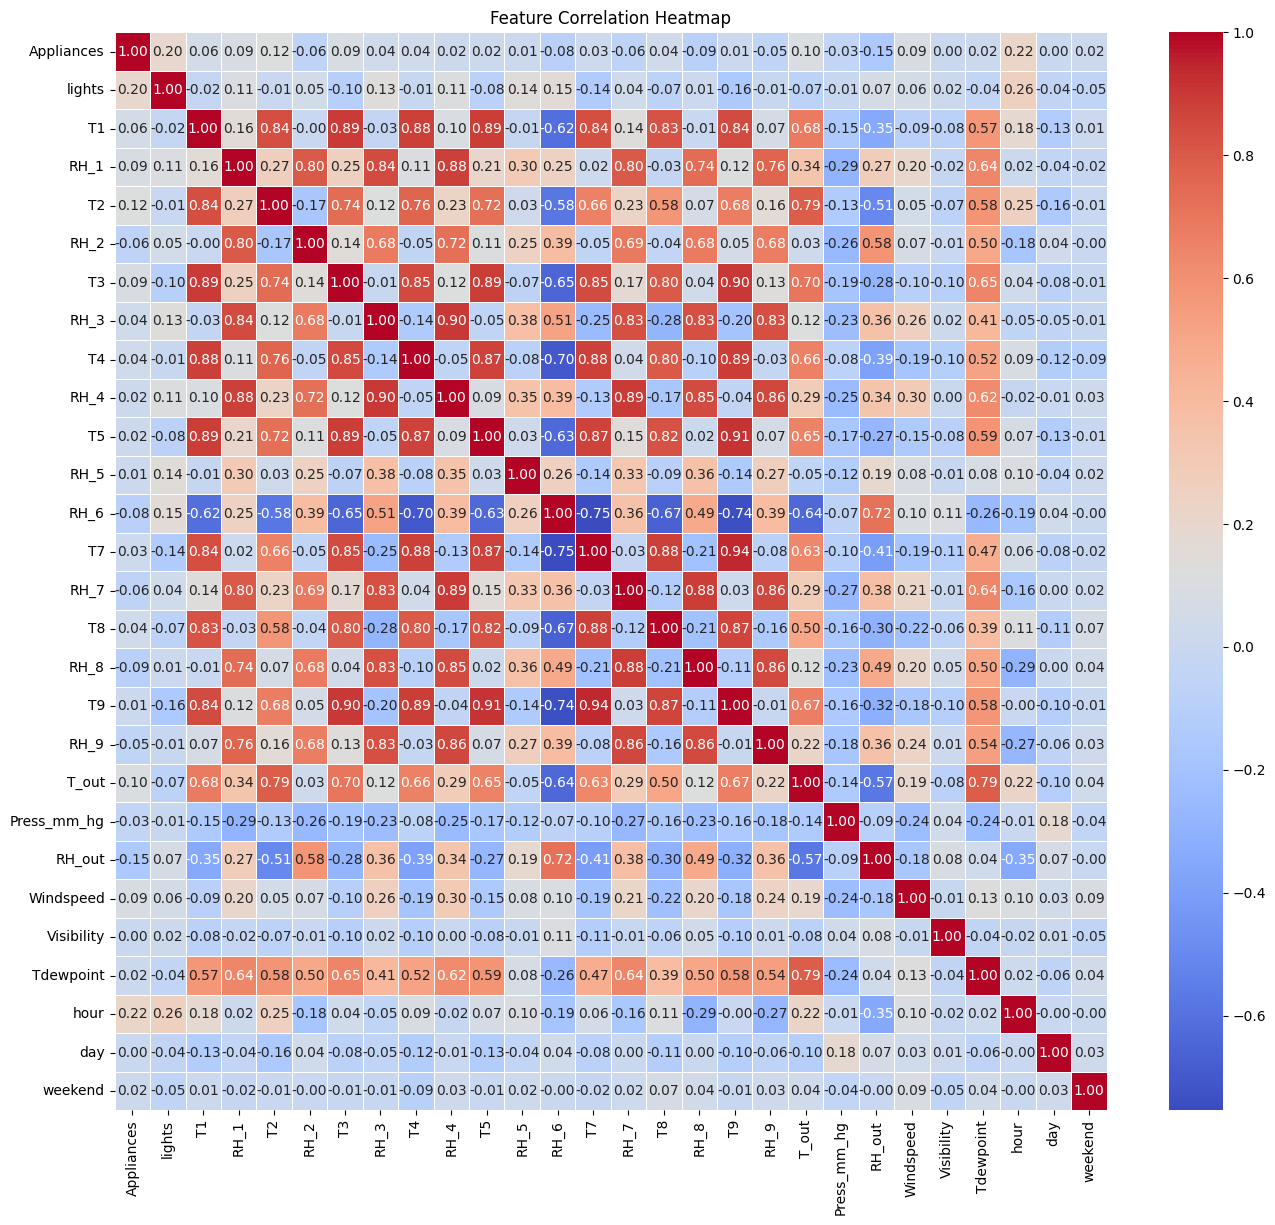

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


just a experiment: using average instead of each sensor value

In [ ]:
# Temperature columns to combine
T_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

# Humidity columns to combine
RH_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

# Compute mean across selected columns
df['T_mean'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']].mean(axis=1)
df['RH_mean'] = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)

# Optional: Drop original columns
df.drop(columns=T_columns + RH_columns, inplace=True)

# Preview result
print(df[['T_mean', 'RH_mean']].head())


      T_mean    RH_mean
0  17.167407  50.910741
1  17.149630  50.827222
2  17.103704  50.628889
3  17.067037  50.574815
4  17.070741  50.732963


In [12]:
df.columns

Index(['Appliances', 'lights', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'hour', 'day_of_week', 'day', 'month',
       'weekend', 'T_mean', 'RH_mean'],
      dtype='object')

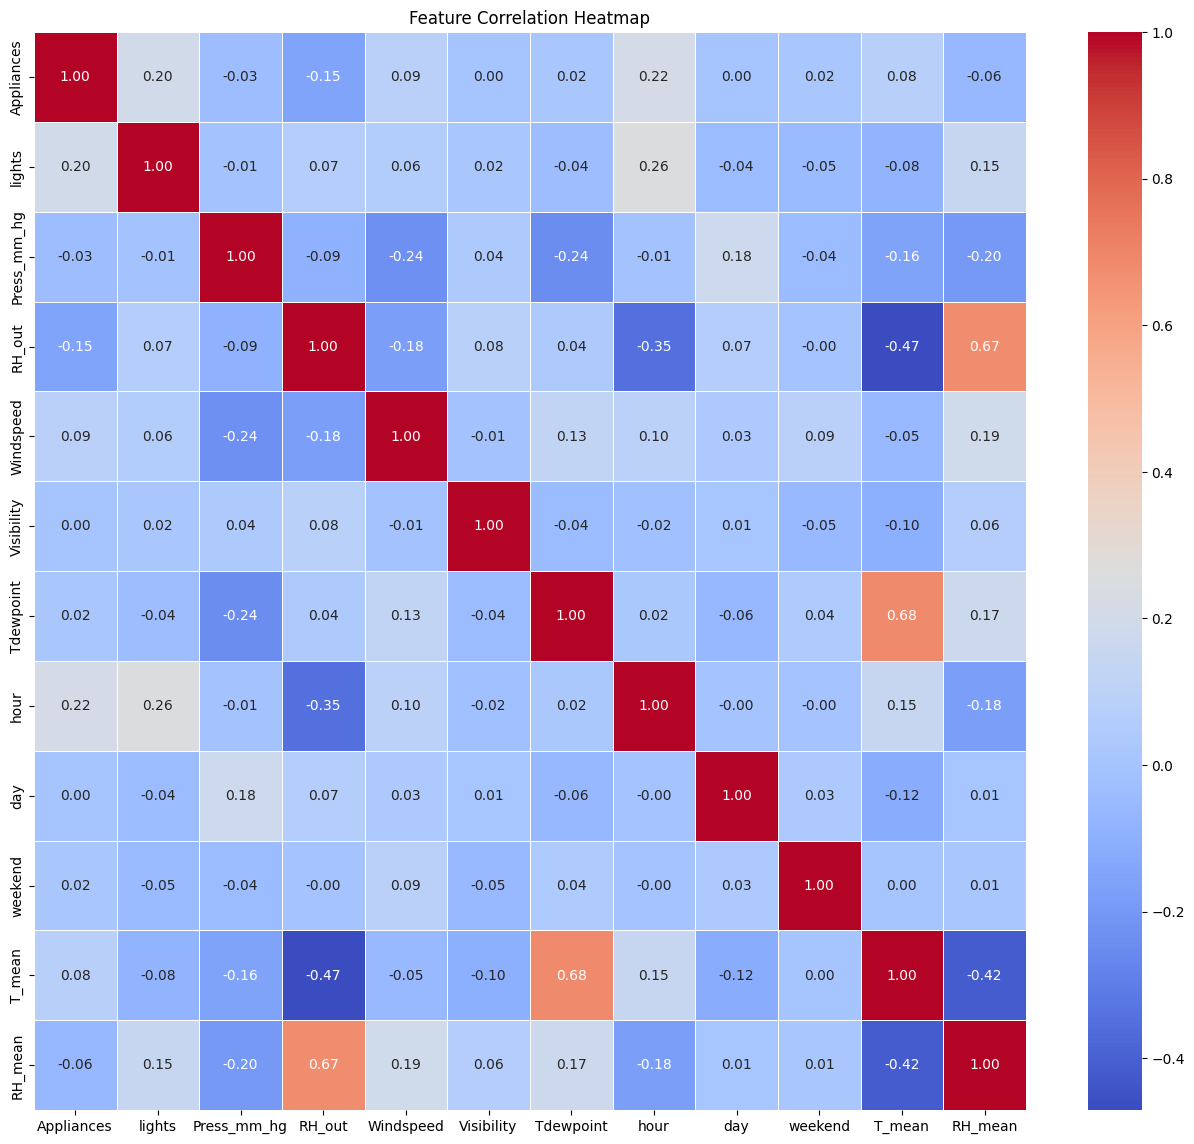

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
df.dtypes

Appliances        int64
lights            int64
Press_mm_hg     float64
RH_out          float64
Windspeed       float64
Visibility      float64
Tdewpoint       float64
hour               int8
day_of_week    category
day                int8
month          category
weekend            bool
T_mean          float64
RH_mean         float64
dtype: object

# Split the data set

In [29]:
df.dtypes

Appliances        int64
lights            int64
T1              float64
RH_1            float64
T2              float64
RH_2            float64
T3              float64
RH_3            float64
T4              float64
RH_4            float64
T5              float64
RH_5            float64
RH_6            float64
T7              float64
RH_7            float64
T8              float64
RH_8            float64
T9              float64
RH_9            float64
T_out           float64
Press_mm_hg     float64
RH_out          float64
Windspeed       float64
Visibility      float64
Tdewpoint       float64
hour               int8
day_of_week    category
day                int8
month          category
weekend            bool
dtype: object

In [30]:
# Appliances, energy use in Wh
X = df.drop('Appliances', axis=1)
y = df['Appliances']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [35]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Define column groups (same as before)
numeric_features = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
    'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
    'hour', 'day'
]
categorical_features = ['day_of_week', 'month']
binary_features = ['weekend']

# Step 3: Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

# Step 4: Full pipeline
linreg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

#  Step 5: Cross-validation on train set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(linreg_pipeline, X_train, y_train, scoring=mae_scorer, cv=kf)
print(f"CV Average MAE: {-neg_mae_scores.mean():.2f}")

# RMSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
neg_mse_scores = cross_val_score(linreg_pipeline, X_train, y_train, scoring=mse_scorer, cv=kf)
print(f"CV Average RMSE: {np.sqrt(-neg_mse_scores).mean():.2f}")

# R²
r2_scores = cross_val_score(linreg_pipeline, X_train, y_train, scoring='r2', cv=kf)
print(f"CV Average R²: {r2_scores.mean():.2f}")

# 🧪 Step 6: Final model on full train → test
linreg_pipeline.fit(X_train, y_train)
y_pred = linreg_pipeline.predict(X_test)

print("\n Final Test Evaluation:")
print("Test MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("Test R²:", round(r2_score(y_test, y_pred), 2))

CV Average MAE: 53.20
CV Average RMSE: 93.94
CV Average R²: 0.17

 Final Test Evaluation:
Test MAE: 52.59
Test RMSE: 91.02
Test R²: 0.17


An R² ≈ 0.17 means the model explains ~17% of the variance in y (and ~83% is still unexplained). CV and test results matching closely is good news: it’s not overfitting. it’s underfitting / missing signal. MAE ~52 and RMSE ~91 means errors are large, and RMSE being much bigger than MAE suggests some big outliers / occasional large misses (RMSE penalizes large errors more).

Fast upgrades that usually help is

A) Add nonlinearity (still simple): Ridge + Polynomial (careful with many features)

B) Try a tree-based model
They capture nonlinear interactions without feature engineering

# Polynomial Regression

In [40]:
# Model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer


#  Column groups
numeric_features = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
    'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
    'hour', 'day'
]
categorical_features = ['day_of_week', 'month']
binary_features = ['weekend']

#  Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

#  Polynomial Regression pipeline
poly_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

#  Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(poly_pipeline, X_train, y_train, scoring=mae_scorer, cv=kf)
print(f"CV Average MAE: {-neg_mae_scores.mean():.2f}")

# RMSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
neg_mse_scores = cross_val_score(poly_pipeline, X_train, y_train, scoring=mse_scorer, cv=kf)
print(f"CV Average RMSE: {np.sqrt(-neg_mse_scores).mean():.2f}")

# R²
r2_scores = cross_val_score(poly_pipeline, X_train, y_train, scoring='r2', cv=kf)
print(f"CV Average R²: {r2_scores.mean():.2f}")

#  Final model evaluation on test set
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)

print("\n Final Test Evaluation:")
print("Test MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("Test R²:", round(r2_score(y_test, y_pred), 2))

CV Average MAE: 49.04
CV Average RMSE: 82.88
CV Average R²: 0.35

 Final Test Evaluation:
Test MAE: 49.0
Test RMSE: 81.43
Test R²: 0.34


adding non-linearity doubled the explained variance From 17% → 34%

That means There ARE nonlinear interactions in the data. Linear regression alone was too simple.

CV R² ≈ Test R² so No serious overfitting. Very good sign.

# Polynomial Features + Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


numeric_features = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
    'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
    'Tdewpoint', 'hour', 'day'
]
categorical_features = ['day_of_week', 'month']
binary_features = ['weekend']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

# Polynomial Ridge Regression pipeline
poly_ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('ridge', Ridge(alpha=100.0))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(poly_ridge_pipeline, X, y, scoring=mae_scorer, cv=kf)
mae_scores = -neg_mae_scores
print(f"Average MAE: {mae_scores.mean():.2f}")

# RMSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
neg_mse_scores = cross_val_score(poly_ridge_pipeline, X, y, scoring=mse_scorer, cv=kf)
rmse_scores = np.sqrt(-neg_mse_scores)
print(f"Average RMSE: {rmse_scores.mean():.2f}")

# R²
r2_scores = cross_val_score(poly_ridge_pipeline, X, y, scoring='r2', cv=kf)
print(f"Average R²: {r2_scores.mean():.2f}")


Average MAE: 47.76
Average RMSE: 85.02
Average R²: 0.31


Performance slightly dropped, Because Ridge adds bias to reduce variance.

In [43]:
# Check the number of features after transformation
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(f"Original features: {X.shape[1]}")
print(f"Polynomial features: {X_poly.shape[1]}")

Original features: 29
Polynomial features: 464


In [44]:
X_poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit_transform(X)
print(f"Reduced polynomial features: {X_poly.shape[1]}")

Reduced polynomial features: 435


In [45]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import numpy as np

#  Target and features
y = df['Appliances']
X = df.drop(columns='Appliances')

#  Column groups
numeric_features = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
    'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
    'Tdewpoint', 'hour', 'day'
]
categorical_features = ['day_of_week', 'month']
binary_features = ['weekend']

#  Preprocessing with Imputer + Scaler for safety
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

#  Final pipeline: Polynomial features → PCA → Ridge Regression
poly_ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('pca', PCA(n_components=50)),  # You can adjust components as needed
    ('ridge', Ridge(alpha=100.0))
])

#  Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(poly_ridge_pipeline, X, y, scoring=mae_scorer, cv=kf)
mae_scores = -neg_mae_scores
print(f"CV Average MAE: {mae_scores.mean():.2f}")

# RMSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
neg_mse_scores = cross_val_score(poly_ridge_pipeline, X, y, scoring=mse_scorer, cv=kf)
rmse_scores = np.sqrt(-neg_mse_scores)
print(f"CV Average RMSE: {rmse_scores.mean():.2f}")

# R²
from sklearn.metrics import r2_score
r2_scores = cross_val_score(poly_ridge_pipeline, X, y, scoring='r2', cv=kf)
print(f"CV Average R²: {r2_scores.mean():.2f}")


CV Average MAE: 54.33
CV Average RMSE: 95.93
CV Average R²: 0.12


In [46]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

poly_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('pca', PCA(n_components=50)),
    ('ridge', Ridge(alpha=100.0))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(poly_ridge_pipeline, X_train, y_train, scoring=mae_scorer, cv=kf)
mae_scores = -neg_mae_scores
print(f"Average MAE: {mae_scores.mean():.2f}")

# RMSE
neg_mse_scores = cross_val_score(poly_ridge_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-neg_mse_scores)
print(f"Average RMSE: {rmse_scores.mean():.2f}")

# R²
r2_scores = cross_val_score(poly_ridge_pipeline, X_train, y_train, scoring='r2', cv=kf)
print(f"Average R²: {r2_scores.mean():.2f}")

Average MAE: 55.73
Average RMSE: 97.14
Average R²: 0.11


# Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import numpy as np

#  Target and features
y = df['Appliances']
X = df.drop(columns='Appliances')

#  Column groups
numeric_features = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
    'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
    'Tdewpoint', 'hour', 'day'
]
categorical_features = ['day_of_week', 'month']
binary_features = ['weekend']

#  Preprocessing: One-hot for categorical, passthrough for numeric & binary
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

#  Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring=mae_scorer, cv=kf)
print(f"CV Average MAE: {-neg_mae_scores.mean():.2f}")

# RMSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
neg_mse_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring=mse_scorer, cv=kf)
print(f"CV Average RMSE: {np.sqrt(-neg_mse_scores).mean():.2f}")

# R²
r2_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='r2', cv=kf)
print(f"CV Average R²: {r2_scores.mean():.2f}")

#  Final test evaluation
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print("\n Final Test Evaluation:")
print("Test MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("Test R²:", round(r2_score(y_test, y_pred), 2))


CV Average MAE: 34.12
CV Average RMSE: 72.08
CV Average R²: 0.51

 Final Test Evaluation:
Test MAE: 30.72
Test RMSE: 65.98
Test R²: 0.56


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

#  Target and features
y = df['Appliances']
X = df.drop(columns='Appliances')

#  Column groups
numeric_features = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
    'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
    'Tdewpoint', 'hour', 'day'
]
categorical_features = ['day_of_week', 'month']
binary_features = ['weekend']

#  Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('bin', 'passthrough', binary_features)
])

#  Base Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Grid Search hyperparameters
param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [100]  # can increase later if needed
}

#  Scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

#  Grid Search
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    scoring=mae_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

#  Fit GridSearch
grid_search.fit(X_train, y_train)

#  Best Parameters + Evaluation
print("Best parameters:", grid_search.best_params_)
print("Best MAE (negative):", grid_search.best_score_)

# Evaluate on test set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid_search.best_estimator_.predict(X_test)

print("\n Final Test Evaluation:")
print("Test MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("Test R²:", round(r2_score(y_test, y_pred), 2))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best MAE (negative): -34.46322532480334

 Final Test Evaluation:
Test MAE: 30.61
Test RMSE: 65.8
Test R²: 0.57


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt']
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring=mse_scorer, 
    cv=kf,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 65.1882009682548


In [115]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {
    'n_estimators': [100],                 
    'max_depth': [None, 20, 30],           
    'min_samples_split': [2],               
    'min_samples_leaf': [1],                
    'max_features': ['sqrt', 'log2']        
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=mae_scorer,    
    cv=kf,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)  


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best MAE: 30.491836838104888


In [49]:
# using best parameters after tuning to fit the model

rf = RandomForestRegressor(n_estimators=200, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split= 2, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")



Test MAE: 28.94
Test RMSE: 62.33
Test R²: 0.61


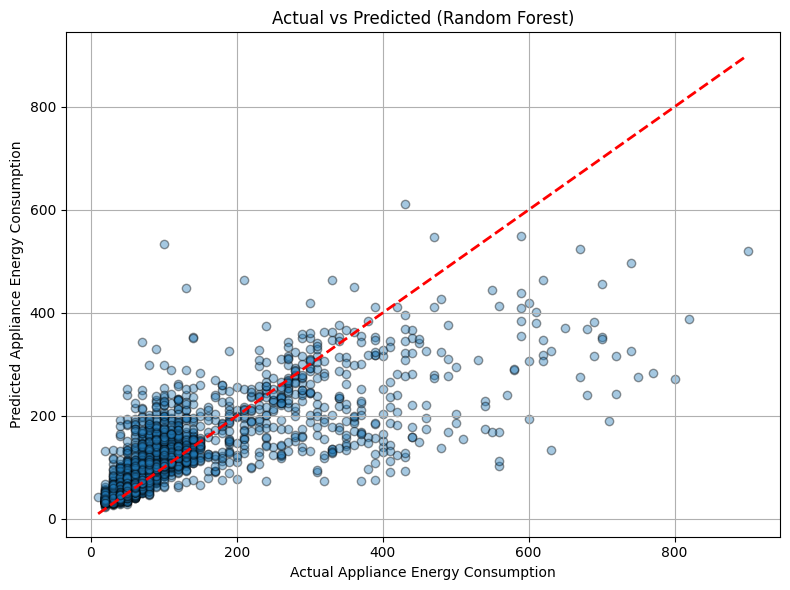

In [119]:
import matplotlib.pyplot as plt

# y_test: actual values
# y_pred: predicted values from Random Forest

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Appliance Energy Consumption")
plt.ylabel("Predicted Appliance Energy Consumption")
plt.title("Actual vs Predicted (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# trying Stratified Shuffle Split to get better fit for higher values
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd

df['Appliance_Bins'] = pd.qcut(df['Appliances'], q=5, labels=False) 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df['Appliance_Bins']):
    train_set = df.iloc[train_idx].drop(columns=['Appliance_Bins'])
    test_set = df.iloc[test_idx].drop(columns=['Appliance_Bins'])

X_train, y_train = train_set.drop(columns=['Appliances']), train_set['Appliances']
X_test, y_test = test_set.drop(columns=['Appliances']), test_set['Appliances']

# Verify the Distribution of Energy Consumption in Train & Test
print("Training set distribution:\n", pd.qcut(y_train, q=5).value_counts(normalize=True))
print("\nTest set distribution:\n", pd.qcut(y_test, q=5).value_counts(normalize=True))


Training set distribution:
 Appliances
(9.999, 50.0]      0.378135
(70.0, 110.0]      0.199329
(110.0, 1080.0]    0.177223
(50.0, 60.0]       0.166266
(60.0, 70.0]       0.079047
Name: proportion, dtype: float64

Test set distribution:
 Appliances
(9.999, 50.0]     0.378009
(70.0, 110.0]     0.199392
(110.0, 890.0]    0.177097
(50.0, 60.0]      0.166456
(60.0, 70.0]      0.079047
Name: proportion, dtype: float64


In [51]:
# Train Random Forest on stratified dataset
rf = RandomForestRegressor(n_estimators=200, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split= 2, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict on stratified test set
y_pred = rf.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Stratified Test MAE: {mae:.2f}")
print(f"Stratified Test RMSE: {rmse:.2f}")
print(f"Stratified Test R²: {r2:.2f}")


Stratified Test MAE: 28.87
Stratified Test RMSE: 61.18
Stratified Test R²: 0.63


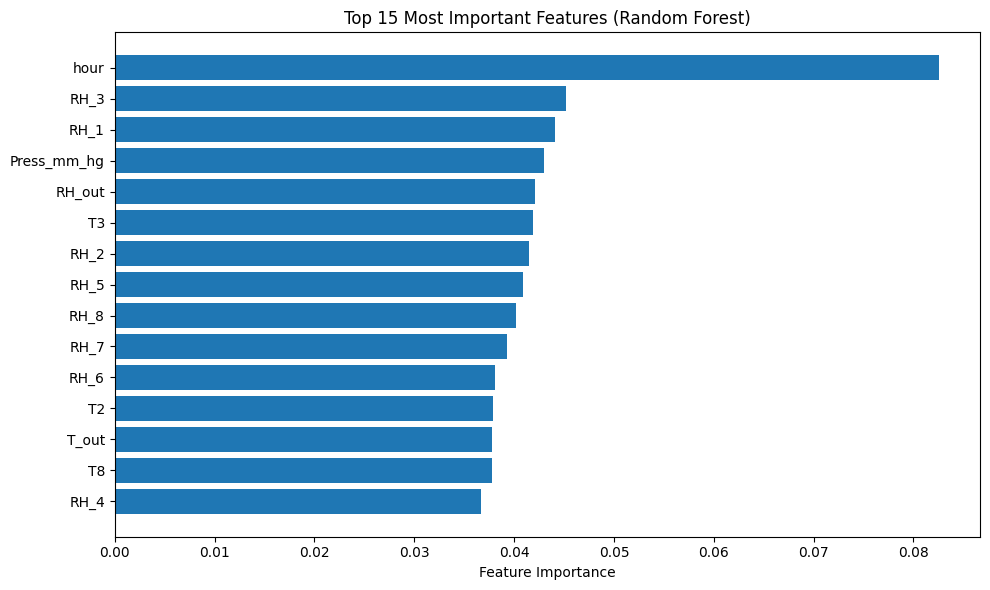

In [52]:
# Get feature importances
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()


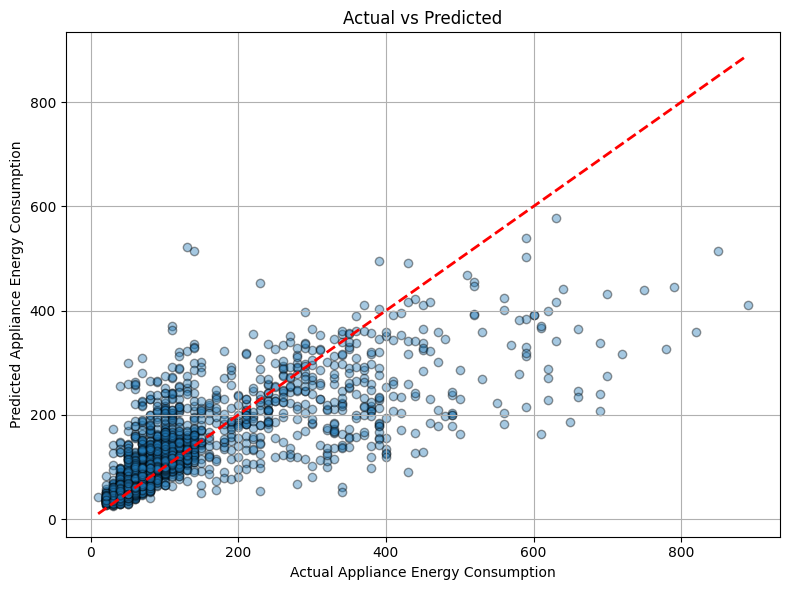

In [124]:
import matplotlib.pyplot as plt

# y_test: actual values
# y_pred: predicted values from Random Forest

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Appliance Energy Consumption")
plt.ylabel("Predicted Appliance Energy Consumption")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Log-transforming the target to help skewed target variable

In [53]:
y_log = np.log1p(y)  # log(1 + Appliances)

In [54]:

rf_log = RandomForestRegressor(n_estimators=100, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split= 2, random_state=42, n_jobs=-1)
rf_log.fit(X_train, np.log1p(y_train))  # IMPORTANT: log-transform y_train only

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'log2'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsam

In [55]:
y_pred_log = rf_log.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)  # inverse of log1p = expm1. Converts the log-predictions back to the original scale 

In [56]:
mae = mean_absolute_error(y_test, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
r2 = r2_score(y_test, y_pred_actual)

print(f"Log-Transformed RF - Test MAE: {mae:.2f}")
print(f"Log-Transformed RF - Test RMSE: {rmse:.2f}")
print(f"Log-Transformed RF - Test R²: {r2:.2f}")


Log-Transformed RF - Test MAE: 27.86
Log-Transformed RF - Test RMSE: 66.68
Log-Transformed RF - Test R²: 0.56


#### removing some less impotant features with unusual distribution

In [57]:
df = df.drop(['lights', 'Visibility'], axis=1)

In [150]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,hour,day_of_week,day,month,weekend
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,6.600000,733.5,92.0,7.000000,5.3,17,0,11,1,0
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,6.483333,733.6,92.0,6.666667,5.2,17,0,11,1,0
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,6.366667,733.7,92.0,6.333333,5.1,17,0,11,1,0
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,6.250000,733.8,92.0,6.000000,5.0,17,0,11,1,0
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,6.133333,733.9,92.0,5.666667,4.9,17,0,11,1,0


In [58]:
X = df.drop('Appliances', axis=1)
y = df['Appliances']

In [59]:
# trying Stratified Shuffle Split to get better fit for higher values
from sklearn.model_selection import StratifiedShuffleSplit

df['Appliance_Bins'] = pd.qcut(df['Appliances'], q=5, labels=False) 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df['Appliance_Bins']):
    train_set = df.iloc[train_idx].drop(columns=['Appliance_Bins'])
    test_set = df.iloc[test_idx].drop(columns=['Appliance_Bins'])

X_train, y_train = train_set.drop(columns=['Appliances']), train_set['Appliances']
X_test, y_test = test_set.drop(columns=['Appliances']), test_set['Appliances']

# Verify the Distribution of Energy Consumption in Train & Test
print("Training set distribution:\n", pd.qcut(y_train, q=5).value_counts(normalize=True))
print("\nTest set distribution:\n", pd.qcut(y_test, q=5).value_counts(normalize=True))

Training set distribution:
 Appliances
(9.999, 50.0]      0.378135
(70.0, 110.0]      0.199329
(110.0, 1080.0]    0.177223
(50.0, 60.0]       0.166266
(60.0, 70.0]       0.079047
Name: proportion, dtype: float64

Test set distribution:
 Appliances
(9.999, 50.0]     0.378009
(70.0, 110.0]     0.199392
(110.0, 890.0]    0.177097
(50.0, 60.0]      0.166456
(60.0, 70.0]      0.079047
Name: proportion, dtype: float64


In [60]:
rf = RandomForestRegressor(n_estimators=200, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split= 2, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict on stratified test set
y_pred = rf.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

Test MAE: 28.17
Test RMSE: 59.61
Test R²: 0.65


In [143]:
# Train Random Forest on stratified log-transformed dataset 
rf_log = RandomForestRegressor(n_estimators=100, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split= 2, random_state=42, n_jobs=-1)
rf_log.fit(X_train, np.log1p(y_train))

y_pred_log = rf_log.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
r2 = r2_score(y_test, y_pred_actual)

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

Test MAE: 27.13
Test RMSE: 64.69
Test R²: 0.59


In [61]:
# check if model is overfitted to train set

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Train set evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test set evaluation
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))
print("Train RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse, 2))
print("Train R²:", round(train_r2, 2))
print("Test R²:", round(test_r2, 2))


Train MAE: 10.95
Test MAE: 28.17
Train RMSE: 24.19
Test RMSE: 59.61
Train R²: 0.94
Test R²: 0.65


In [66]:
# trying to change parameters to get make the model balanced
rf = RandomForestRegressor(n_estimators=200, max_depth=14, max_features='log2', min_samples_leaf=6, min_samples_split=2, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Train set evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test set evaluation
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))
print("Train RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse, 2))
print("Train R²:", round(train_r2, 2))
print("Test R²:", round(test_r2, 2))
print("MAE:", round((round(train_mae, 2) - round(test_mae, 2)), 2))
print("RMSE:", round((round(train_rmse, 2) - round(test_rmse, 2)), 2))
print("Train R²:", round((round(train_r2, 2) - round(test_r2, 2)), 2))

Train MAE: 32.5
Test MAE: 36.63
Train RMSE: 65.85
Test RMSE: 72.62
Train R²: 0.59
Test R²: 0.48
MAE: -4.13
RMSE: -6.77
Train R²: 0.11


There is some overfitting

Train R² = 0.64
Test R² = 0.50

Difference = 0.14

That’s noticeable, but not catastrophic. For Random Forest, this is actually very common.

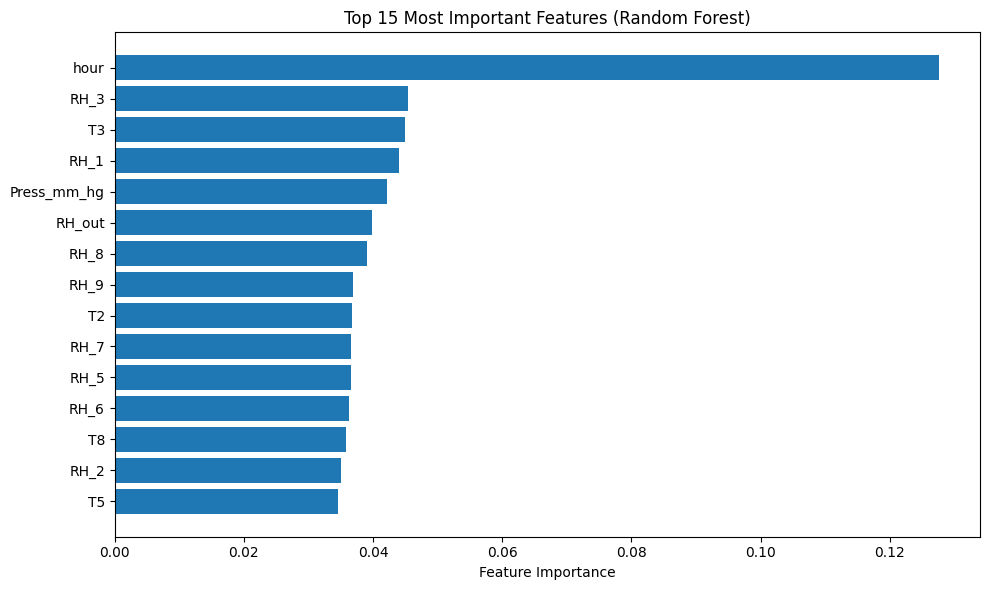

In [215]:
# Get feature importances
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()


# XGBoost Regressor

In [69]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 1.1/150.0 MB 11.5 MB/s eta 0:00:13
    --------------------------------------- 3.4/150.0 MB 24.0 MB/s eta 0:00:07
   - -------------------------------------- 6.1/150.0 MB 32.2 MB/s eta 0:00:05
   -- ------------------------------------- 8.6/150.0 MB 36.7 MB/s eta 0:00:04
   -- ------------------------------------- 11.1/150.0 MB 50.4 MB/s eta 0:00:03
   --- ------------------------------------ 13.7/150.0 MB 54.7 MB/s eta 0:00:03
   ---- ----------------------------------- 16.0/150.0 MB 50.4 MB/s eta 0:00:03
   ----- ---------------------------------- 18.8/150.0 MB 54.4 MB/s eta 0:00:03
   ----- ---------------------------------- 21.3/150.0 MB 54.4 MB/s eta 0:00:03
   ------ --------------------------------- 23.8/150.0 MB 50.4 MB/s eta 0:00:03
   ------- -------------------------------- 26.3/150.0

In [216]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=6,        
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# MAE Cross-Validation
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mae_scores = cross_val_score(xgb, X_train, y_train, scoring=mae_scorer, cv=kf)
mae_scores = -neg_mae_scores

# RMSE Cross-Validation
neg_mse_scores = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-neg_mse_scores)

# R² Cross-Validation
r2_scores = cross_val_score(xgb,X_train, y_train, scoring='r2', cv=kf)

print(f"Average MAE: {mae_scores.mean():.2f}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")
print(f"Average R²: {r2_scores.mean():.2f}")


Average MAE: 38.58
Average RMSE: 76.40
Average R²: 0.45


In [225]:
# tuning to find a more balanced model
xgb = XGBRegressor(
    n_estimators=100,  
    learning_rate=0.05,  
    max_depth=4,        
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42,
    n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Train set evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test set evaluation
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))
print("Train RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse, 2))
print("Train R²:", round(train_r2, 2))
print("Test R²:", round(test_r2, 2))
print("DIFF MAE:", round((round(train_mae, 2) - round(test_mae, 2)), 2))
print("DIFF RMSE:", round((round(train_rmse, 2) - round(test_rmse, 2)), 2))
print("DIFF Train R²:", round((round(train_r2, 2) - round(test_r2, 2)), 2))


Train MAE: 44.35
Test MAE: 44.33
Train RMSE: 83.15
Test RMSE: 82.33
Train R²: 0.35
Test R²: 0.33
DIFF MAE: 0.02
DIFF RMSE: 0.82
DIFF Train R²: 0.02


In [226]:
# tuning to find a more balanced model
xgb = XGBRegressor(
    n_estimators=100,  
    learning_rate=0.05,  
    max_depth=6,   # increasing the max_depth     
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42,
    n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Train set evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test set evaluation
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))
print("Train RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse, 2))
print("Train R²:", round(train_r2, 2))
print("Test R²:", round(test_r2, 2))
print("DIFF MAE:", round((round(train_mae, 2) - round(test_mae, 2)), 2))
print("DIFF RMSE:", round((round(train_rmse, 2) - round(test_rmse, 2)), 2))
print("DIFF Train R²:", round((round(train_r2, 2) - round(test_r2, 2)), 2))


Train MAE: 37.51
Test MAE: 39.81
Train RMSE: 71.62
Test RMSE: 75.52
Train R²: 0.52
Test R²: 0.44
DIFF MAE: -2.3
DIFF RMSE: -3.9
DIFF Train R²: 0.08


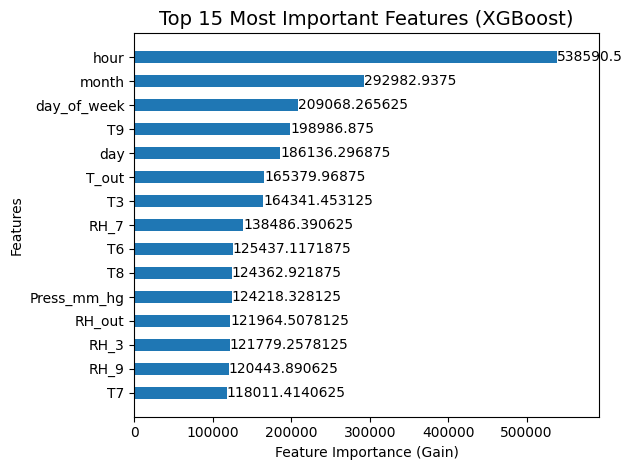

In [235]:
import matplotlib.pyplot as plt
import xgboost as xgb_module  

xgb_module.plot_importance(
    xgb,                         
    max_num_features=15,
    importance_type='gain',
    height=0.5,
    grid=False)

plt.title('Top 15 Most Important Features (XGBoost)', fontsize=14)
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()
